### Web_Scraping using urllib Library

In [1]:
import urllib

In [2]:
# url link:-  https://en.wikipedia.org/wiki/Rajgad_Fort
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')

In [3]:
url

In [4]:
data = url.read().decode('utf-8')

In [5]:
data

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Rajgad Fort - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-cl

In [6]:
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')

data = url.read()           #it will return list of lines in code

In [7]:
data = data.decode('utf -8')

start = data.find('<title>')
start

624

In [8]:
end =data.find('</title>')
end

654

In [9]:
data[673:696]

'unction(){var className'

In [10]:
import re
len(re.findall('<img.*?>',data))

29

In [11]:
data.count('<img')

29

In [12]:
pattern = "<title.*?>.*?</title.*?>"
match_result = re.search(pattern,data,re.IGNORECASE)
title = match_result.group()
title = re.sub("<.*?>","",title)   #Remove the html tag

print(title)

Rajgad Fort - Wikipedia


In [13]:
from bs4 import BeautifulSoup

In [14]:
soup = BeautifulSoup(data,'html.parser')

In [15]:
text =soup.get_text()   #Strip remves the white spaces

#text = ' '.join(text.split())

In [16]:
print(text)





Rajgad Fort - Wikipedia




































Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload file





Languages

Language links are at the top of the page across from the title.



















Search











Search





























Create account

Log in








Personal tools





 Create account Log in





		Pages for logged out editors learn more



ContributionsTalk




























Contents
move to sidebar
hide




(Top)





1History



Toggle History subsection





1.1List of chronological events









2Tourism







3Gallery







4See also







5References







6External links

















Toggle the table of contents







Rajgad Fort



7 languages




Españolहिन्दीमराठीمصرىनेपाल भाषाپنجابیاردو

Edit links











Ar

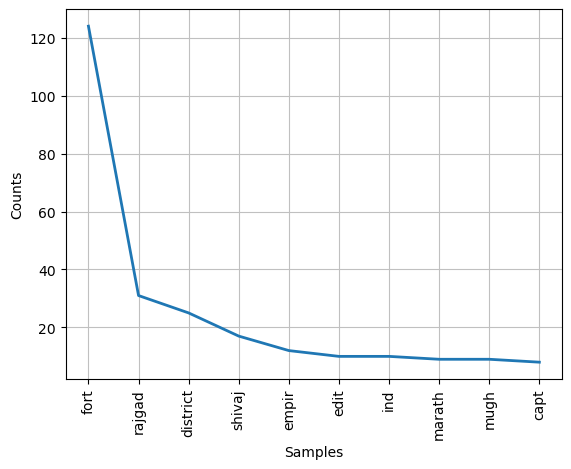

[('fort', 124), ('rajgad', 31), ('district', 25)]

In [17]:
###----------------
### import Library
###----------------
import urllib
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import LancasterStemmer
from nltk import FreqDist
import string


url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort') #Hit the linkk
data = url.read()
soup = BeautifulSoup(data,'html.parser')
text =soup.get_text().lower()
text = ' '.join(text.split())    #Retrive the data

token = word_tokenize(text)


#removing the punctuation from the text
lst = []
for word in token:
    if word not in string.punctuation:
        lst.append(word) 
        
stw = stopwords.words('english')

#removing the stopwords
clean_lst = []
for word in lst:
    if word.isalpha() or word.isdigit():
        if (word not in stw):
            clean_lst.append(word)
clean_lst

#Stemming Operation
ls = LancasterStemmer()
lst_stemmer = []
for word in clean_lst:
    lst_stemmer.append(ls.stem(word))
    

#Plotting the top three labels in the article    
freq = FreqDist(lst_stemmer)
freq.plot(10,cumulative=False)     #Frequency plot :plot the word according to their frequency in the text
freq.most_common(3)

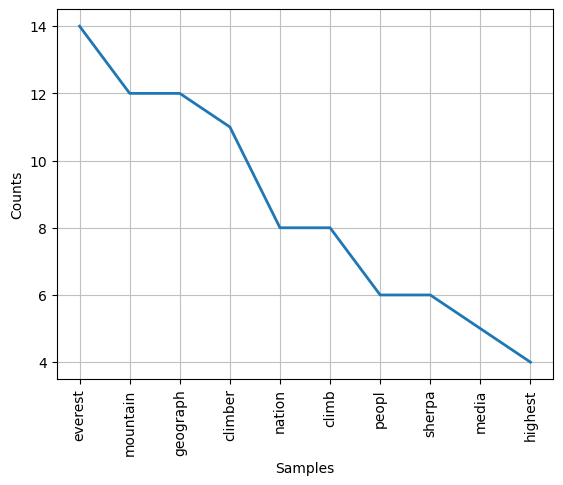

[('everest', 14), ('mountain', 12), ('geograph', 12)]

In [18]:
url = urllib.request.urlopen('https://education.nationalgeographic.org/resource/mount-everest/')
data=url.read()

soup = BeautifulSoup(data,'html.parser')
text =soup.get_text().lower()

from nltk.stem import PorterStemmer
ps=PorterStemmer()

tokens=word_tokenize(text)
swords=stopwords.words('english')

tokens1=[x.lower() for x in tokens if x.isalpha() or x.isdigit()]
tokens2=[ps.stem(x) for x in tokens1 if x not in swords]

freq=FreqDist(tokens2)
freq.plot(10)
freq.most_common(3)

In [19]:
import pygooglenews

ModuleNotFoundError: No module named 'pygooglenews'

In [ ]:
google = pygooglenews.GoogleNews()

In [ ]:
google.search('war')

In [ ]:
#Verb in their original form        :Check later 
###----------------
### import Library
###----------------
import urllib
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import LancasterStemmer
from nltk import FreqDist,pos_tag
import string
from nltk.stem import WordNetLemmatizer

url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort') #Hit the linkk
data = url.read()
soup = BeautifulSoup(data,'html.parser')
text =soup.get_text().lower()
text = ' '.join(text.split())                                             #Retrive the data

token = word_tokenize(text)

#removing the punctuation from the text
lst = []
for word in token:
    if word not in string.punctuation:
        lst.append(word) 
        
stw = stopwords.words('english')

#removing the stopwords
clean_lst = []
for word in lst:
    if word.isalpha() or word.isdigit():
        if (word not in stw):
            clean_lst.append(word)
clean_lst

tags = pos_tag(clean_lst)

#Stemming Operation
wnl = WordNetLemmatizer()
lst_stemmer = []
for word,tag in tags:
    
    lst_stemmer.append(wnl.lemmatize(word,pos ='v'))
    

#Plotting the top three labels in the article    
freq = FreqDist(lst_stemmer)
freq.plot(10,cumulative=False)     #Frequency plot :plot the word according to their frequency in the text
freq.most_common(3)

In [ ]:
from nltk.stem import WordNetLemmatizer
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Moon')
data=url.read()

wnl=WordNetLemmatizer()

soup = BeautifulSoup(data,'html.parser')
text =soup.get_text()

tokens=word_tokenize(text)
swords=stopwords.words('english')

tokens1=[x for x in tokens if x.isalpha()]
tags=pos_tag(tokens1)
tokens2=[word[0].lower() for word in tags if word[1].startswith('V')]
tokens3=[wnl.lemmatize(x,'v') for x in tokens2 if x not in swords]

freq=FreqDist(tokens3)
freq.plot(10)
freq.most_common(3)

In [ ]:
from nltk.stem import WordNetLemmatizer
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')
data=url.read()

wnl=WordNetLemmatizer()

soup = BeautifulSoup(data,'html.parser')
text =soup.get_text()

tokens=word_tokenize(text)
swords=stopwords.words('english')

tokens1=[x for x in tokens if x.isalpha()]
tags=pos_tag(tokens1)
tokens2=[word[0].lower()  for word in tags if word[1].startswith('V')]
tokens3=[wnl.lemmatize(x,'v') for x in tokens2 if x not in swords]

freq=FreqDist(tokens3)
freq.plot(10)
freq.most_common(3)